## Importing Libraries

In [1]:
#importing libs
import warnings, datetime, csv,itertools, pandas as pd, matplotlib.pyplot as plt
import numpy as np
# for csv data 
from pandas import DataFrame
from pandas import concat
from pandas import Series 
# for normalization and scaling
from sklearn import preprocessing
# for measuring the accuracy of the model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
# models for fitting and predicting
from sklearn import tree
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
# for correlation plotting
from pandas.tools.plotting import lag_plot
# for preventing warnings messages
warnings.filterwarnings('ignore')

## Loading CSV and defining plots parameters

In [4]:
#reading the dataset and converting date & time column into datetime obj
df = pd.read_csv('/home/reem/Desktop/codes/WQ/wqfull1.csv')
df['datetime'] =  pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')
colors = ['r','b','y','g']
models_names = ['MLP','Linear Regression','Logistic Regression','Decision Tree Regressor']
features_names = ['Sampling depth','Temperature','pH','Chlorophylls']
accuracy = [explained_variance_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score]

## Measurements over the past 8 years

In [5]:
#--- The quadrant plot since 21/10/2010 until 18/3/2018 ---
def measurements():
    X = np.arange(len(df))
    for i in range(4):
        plt.subplot( 2, 2, i+1 )
        plt.plot(X,df.iloc[:,(4+2*i)],c='k')
        plt.margins(0,0)
        plt.title(features_names[i])
        plt.xlabel( 'days over 8 years' )
        plt.ylabel( 'Measurement' )
        plt.grid()
    plt.show()

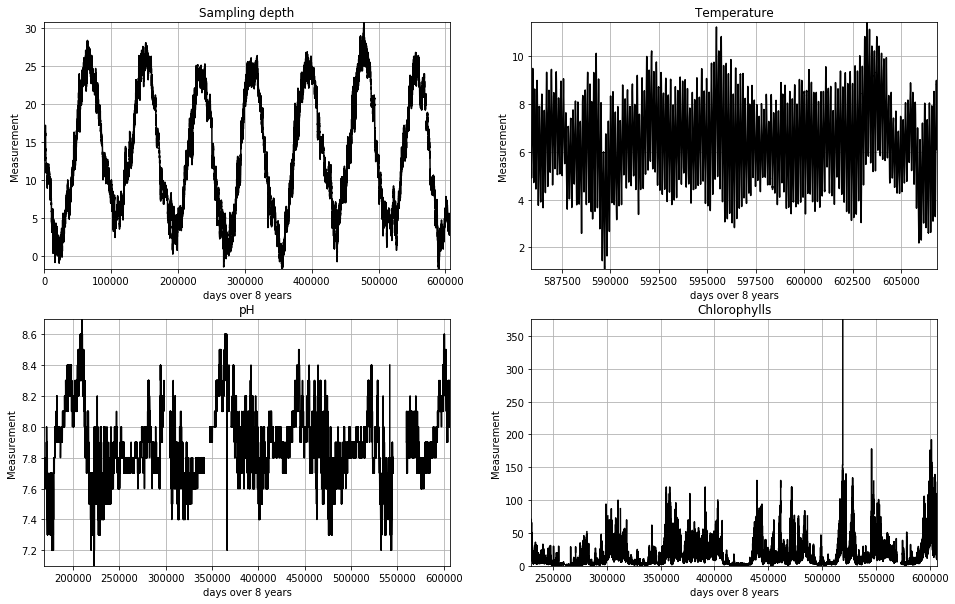

In [6]:
plt.figure(figsize=(16,10))
measurements()

## Correlation

In [7]:
#--- The correlation between each value and the following one ---
def correlation():
    
    for i in range(4):
        plt.subplot( 2, 2, i+1 )
        n1 = lag_plot(df.iloc[:,(4+2*i)],c='k',alpha='0.4')
        plt.title(features_names[i])
        plt.grid()

    plt.show()

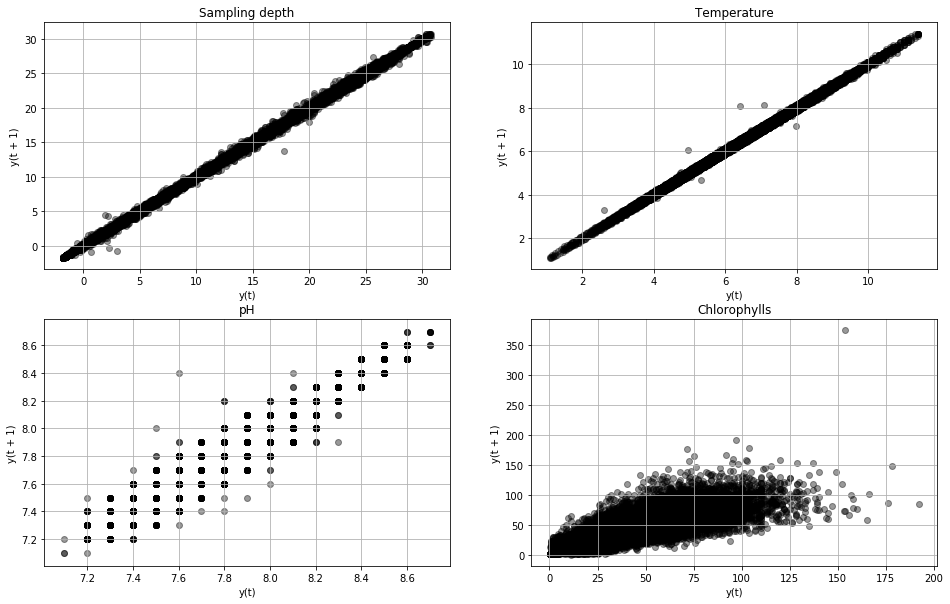

In [8]:
plt.figure(figsize=(16,10))
correlation()

In [9]:
#find the value of the correlation for the features
for i in range(4):
    values = DataFrame(df.iloc[:,4+2*i].values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    result = dataframe.corr()
    print(features_names[i],'\n',result,'\n')

Sampling depth 
          t-1      t+1
t-1  1.00000  0.99996
t+1  0.99996  1.00000 

Temperature 
          t-1      t+1
t-1  1.00000  0.99881
t+1  0.99881  1.00000 

pH 
           t-1       t+1
t-1  1.000000  0.994897
t+1  0.994897  1.000000 

Chlorophylls 
           t-1       t+1
t-1  1.000000  0.950768
t+1  0.950768  1.000000 

